In [1]:
import LinearAlgebra
import LinearAlgebra.svd
import LinearAlgebra.SVD
import LinearAlgebra.Diagonal

In [2]:
using Images, TestImages, Colors

In [3]:
function svd_compresion(F::SVD, r)
    U, S, V = F
    M = U[:, 1:r] * Diagonal(S[1:r]) * transpose(V[:, 1:r])
    clamp01!(M)
end

svd_compresion (generic function with 1 method)

In [4]:
function selected_compresions(img)
    channels = channelview(img)
    svdfactors = (svd(channels[1,:,:]), svd(channels[2,:,:]), svd(channels[3,:,:]))
#     For Julia ≧ v1.1
#     svdfactors = svd.(eachslice(channels; dims=1))
    imgs = map(n -> colorview(RGB, svd_compresion.(svdfactors, n)...), (2, 3, 5, 10, 25, 50, 100, 150, 200))
    mosaicview(img, imgs...; nrow=5, npad=5, rowmajor=true)
end

selected_compresions (generic function with 1 method)

In [30]:
function number_od_singularities(img)
    channels = channelview(img)
    svdfactors = (svd(channels[1,:,:]), svd(channels[2,:,:]), svd(channels[3,:,:]))
    _, S1, _ = svdfactors[1]
    _, S2, _ = svdfactors[2]
    _, S3, _ = svdfactors[3]
    return maximum(map(S -> sum(S .!= 0.0), (S1, S2, S3)))
end

number_od_singularities (generic function with 1 method)

In [36]:
function compression_ratio(img)
    num_of_taken_sing = (2, 3, 5, 10, 25, 50, 100, 150, 200)
    n, m = size(img)
    compresions = [string(i, ". ", round(100*(i*n + i + i*m)/(n*m), digits=2), "%\n") for i in 
            (2, 3, 5, 10, 25, 50, 100, 150, 200)]
    return compresions
end

compression_ratio (generic function with 1 method)

Image size: (512, 768)
Number of singularities: 512
2. 0.65%
3. 0.98%
5. 1.63%
10. 3.26%
25. 8.14%
50. 16.29%
100. 32.58%
150. 48.87%
200. 65.16%


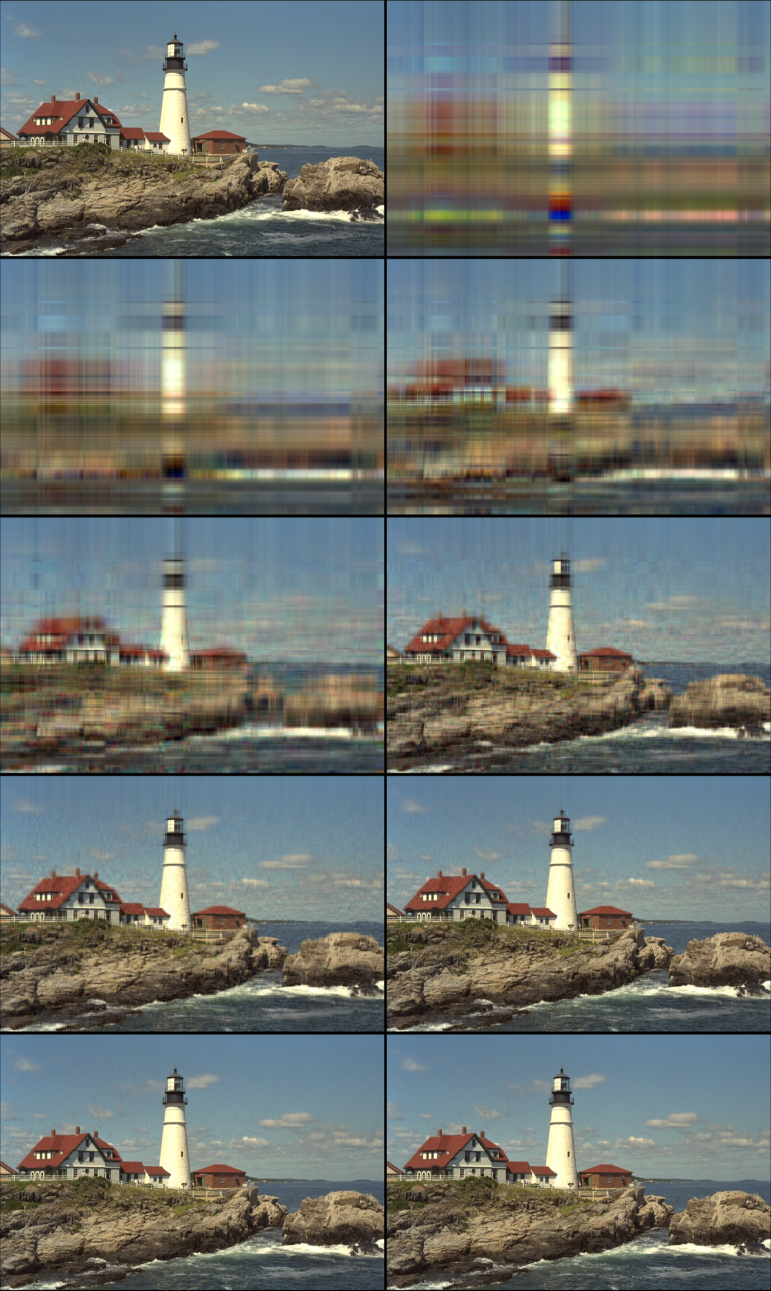

In [45]:
img1 = float.(testimage("lighthouse"))
print("Image size: ", size(img1), "\n", "Number of singularities: ", number_od_singularities(img1), "\n")
for i in compression_ratio(img1)
    print(i)
end
selected_compresions(img1)

Image size: (512, 512)
Number of singularities: 512
2. 0.78%
3. 1.17%
5. 1.96%
10. 3.91%
25. 9.78%
50. 19.55%
100. 39.1%
150. 58.65%
200. 78.2%


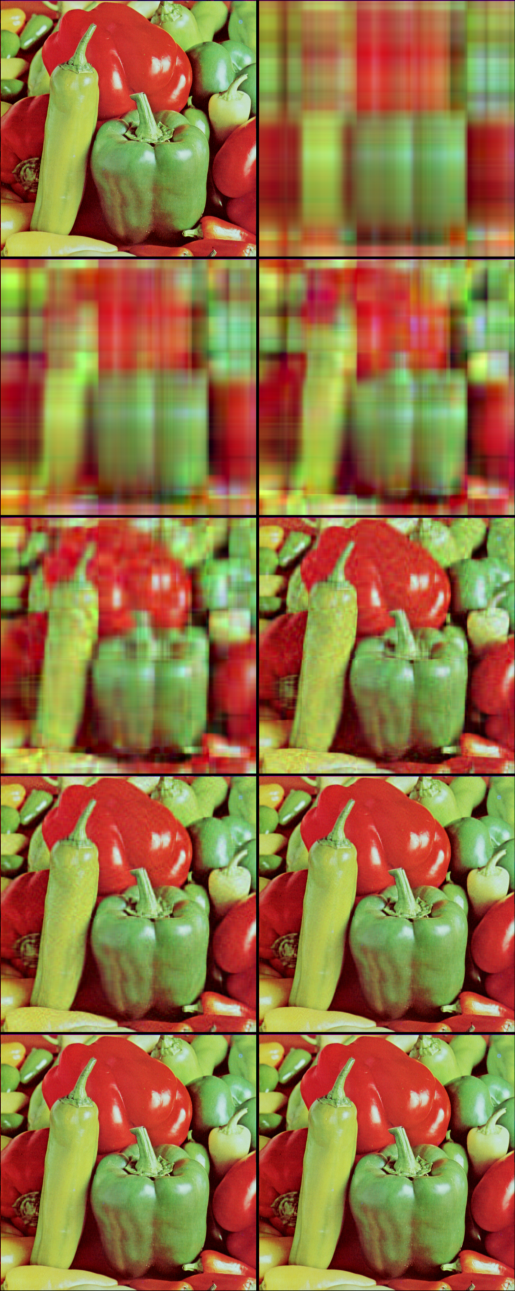

In [44]:
img2 = float.(testimage("peppers_color"))
print("Image size: ", size(img2), "\n", "Number of singularities: ", number_od_singularities(img2), "\n")
for i in compression_ratio(img2)
    print(i)
end
selected_compresions(img2)

512
(512, 768)

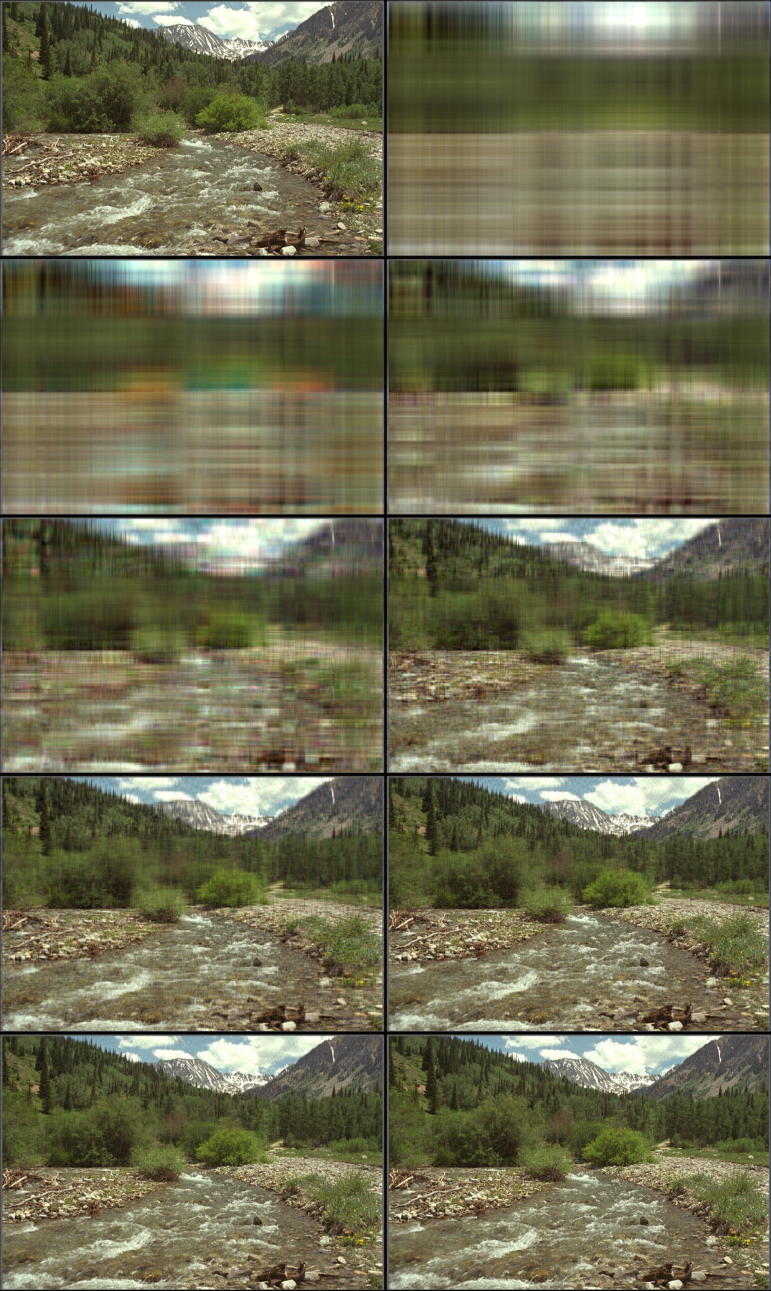

In [27]:
img3 = float.(testimage("mountainstream"))
print(number_od_singularities(img3), "\n")
print(size(img3))
selected_compresions(img3)